## Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [3]:
# Load the country clusters data
data = pd.read_csv('Red.csv')

In [4]:
data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


In [5]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               8
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

## Plot the Data

<function matplotlib.pyplot.show(close=None, block=None)>

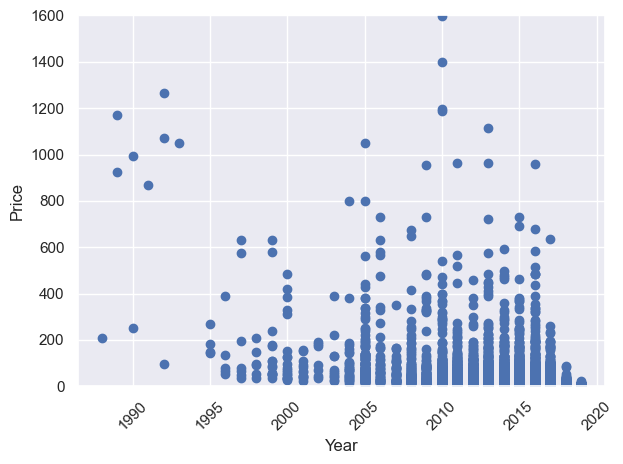

In [7]:
# Use the simplest code possible to create a scatter plot using the Year and Price
plt.scatter(data_no_mv['Year'],data_no_mv['Price'])
plt.ylim(0,1600)
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

## Select the features

In [21]:
x = data_no_mv.iloc[:,6:8]

In [22]:
x

,Price,Year
0,95.00,2011.0
1,15.50,2017.0
2,7.45,2015.0
3,8.72,2019.0
4,29.15,2016.0
...,...,...
8661,16.47,2016.0
8662,20.09,2016.0
8663,23.95,2010.0
8664,6.21,2019.0


## Clustering (unscaled data)

In [23]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [24]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
# Create a copy of the data
data_with_clusters = data_no_mv.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Cluster
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,2
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,0
...,...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,0
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,0
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,0
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

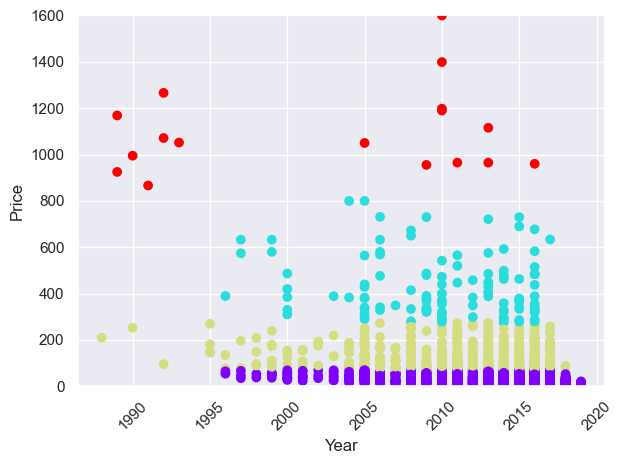

In [26]:
# Use the simplest code possible to create a scatter plot using the Year and Price
plt.scatter(data_with_clusters['Year'],data_with_clusters['Price'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.ylim(0,1600)
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [27]:
## The Clusters are defined mostly on Price, as it is treated as a dominant Feature.

## Standardize the variables

In [28]:
from sklearn import preprocessing
# scale the data for better results
x_scaled = preprocessing.scale(x)
x_scaled

array([[ 0.65738152, -1.1637797 ],
       [-0.2783684 ,  0.66489628],
       [-0.37312044,  0.05533762],
       ...,
       [-0.17890819, -1.46855903],
       [-0.38771578,  1.27445494],
       [-0.36805915,  0.36011695]])

## Clustering (scaled data)

In [29]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=4)

In [30]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data_no_mv.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

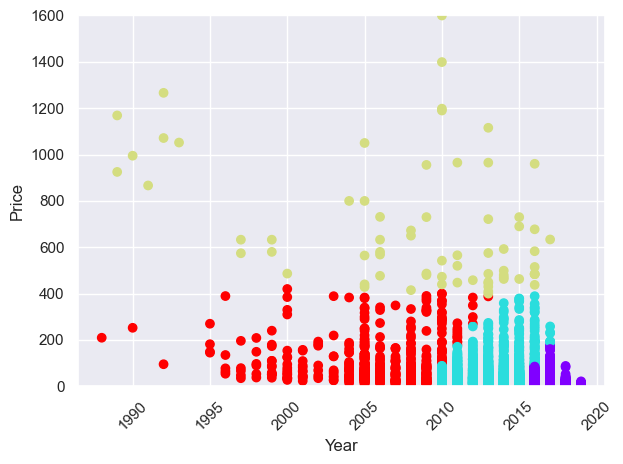

In [31]:
# Use the simplest code possible to create a scatter plot using the Year and Price
plt.scatter(clusters_scaled['Year'],clusters_scaled['Price'],c=clusters_scaled['cluster_pred'],cmap='rainbow')
plt.ylim(0,1600)
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [35]:
# Scaling has taken some weight from Price and added it to Year. 
# Wines under 400 dollars are devided in clusters according to their age.
# A separate cluster represents luxury expensive wines, where year's roles is not that significant. 

## Exploring the Number of Clusters

### WCSS

In [37]:
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[17316.000000000004,
 10838.432187356459,
 7199.1160109911525,
 5570.806079040681,
 5010.673873442937,
 3454.0969617780274,
 2777.4909530435934,
 2737.233031839139,
 2086.422665844979]

Text(0, 0.5, 'Within-cluster Sum of Squares')

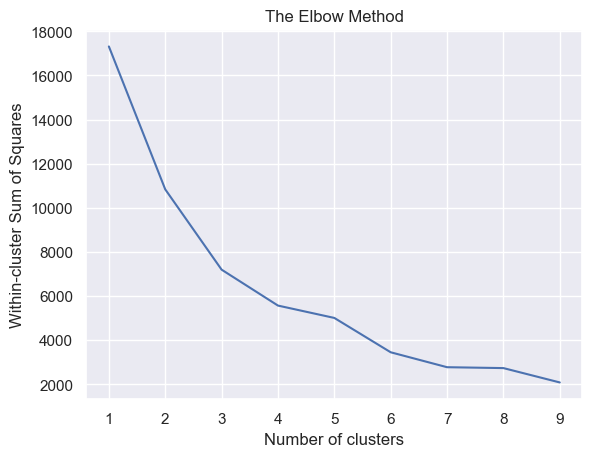

In [38]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [41]:
# 6 clusters can demonstrate more suitable result, so we will try it

In [40]:
kmeans_scaled = KMeans(6)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=6)

In [42]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data_no_mv.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

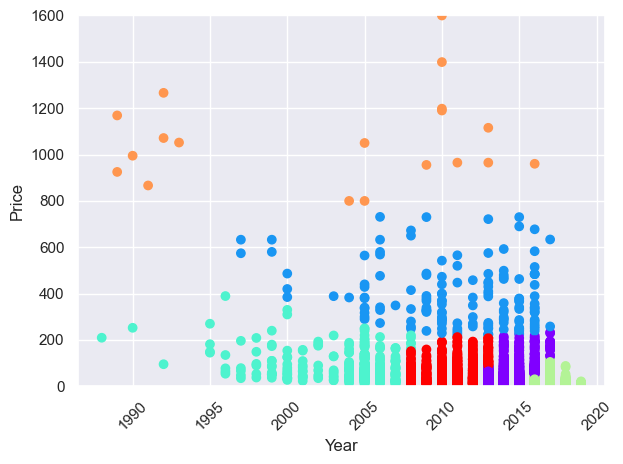

In [43]:
# Use the simplest code possible to create a scatter plot using the Year and Price
plt.scatter(clusters_scaled['Year'],clusters_scaled['Price'],c=clusters_scaled['cluster_pred'],cmap='rainbow')
plt.ylim(0,1600)
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show